# **Spam Classification using NLP**

download the csv file using this link : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download

Import modules

In [67]:
import pandas as pd
import nltk

Step 01

In [45]:
df = pd.read_csv("spam.csv",encoding="latin-1")

In [46]:
df.shape

(5572, 5)

In [47]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [48]:
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)
df.sample(5)

,class,sms
3558,spam,URGENT! We are trying to contact U Todays draw...
4393,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
620,ham,Dear we got &lt;#&gt; dollars hi hi
5450,ham,Sac needs to carry on:)
242,ham,"Okay. No no, just shining on. That was meant t..."


In [49]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [50]:
df=df.drop_duplicates(keep='first')

In [51]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516                         Rofl. Its true to its name    1
spam    653    653  This is the 2nd time we have tried 2 contact u...    1

In [52]:
df['Length']=df['sms'].apply(len)
df.head(3)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

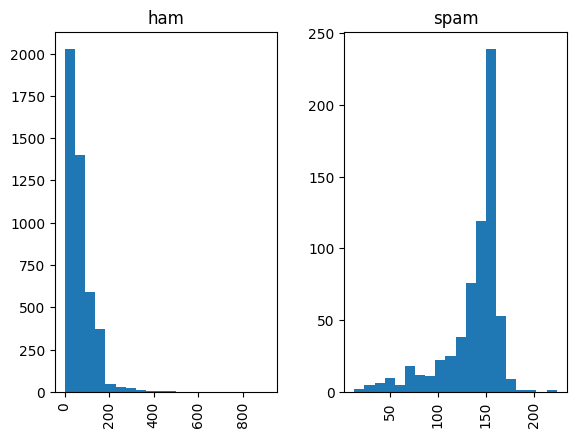

In [53]:
df.hist(column='Length',by='class',bins=20)

Step 02 : Preprocessing

In [54]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps=PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
import string


def clean_text(text):
  text= text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [57]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [58]:
df['sms_cleaned']=df['sms'].apply(clean_text)

In [59]:
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


Step 03 : Feature Extraction

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [61]:
tf=TfidfVectorizer(max_features=3000)
x=tf.fit_transform(df['sms_cleaned']).toarray()

In [62]:
x.shape

(5169, 3000)

In [63]:
y=df['class'].values

Step 03: Trainig

In [64]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
y_pred=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred, pos_label='spam'))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
